Simulation study: Toy example for checking the ability of detecting concept drift on simulated data

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sys
import pandas as pd
import math
import random
import statistics
import scipy
import tensorflow

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from scipy.stats import beta
from sklearn import preprocessing
from collections import Counter

from mpl_toolkits import mplot3d

In [2]:
# SET RANDOM SEED FOR REPRODUCIBILITY
seed = 10
np.random.seed(seed)

In [3]:
# # Define dimension
d = 7
n = 100

# DISTRIBUTION 1
# Set mean vector 
m_1 = np.full((d,), 0.0)

In [ ]:
m_1

array([0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# Set variance-covariance matrix
cov_mat_1 = np.matrix('1.0 0.3 0.0 0.0 0.0 0.0 0.0; 0.3 1 0.3 0.0 0.0 0.0 0.0; 0.0 0.3 1.0 0.3 0.0 0.0 0.0; 0.0 0.0 0.3 1.0 0.3 0.0 0.0; 0.0 0.0 0.0 0.3 1.0 0.3 0.0; 0.0 0.0 0.0 0.0 0.3 1.0 0.3; 0.0 0.0 0.0 0.0 0.0 0.3 1.0')

In [ ]:
cov_mat_1

matrix([[1. , 0.3, 0. , 0. , 0. , 0. , 0. ],
        [0.3, 1. , 0.3, 0. , 0. , 0. , 0. ],
        [0. , 0.3, 1. , 0.3, 0. , 0. , 0. ],
        [0. , 0. , 0.3, 1. , 0.3, 0. , 0. ],
        [0. , 0. , 0. , 0.3, 1. , 0.3, 0. ],
        [0. , 0. , 0. , 0. , 0.3, 1. , 0.3],
        [0. , 0. , 0. , 0. , 0. , 0.3, 1. ]])

In [ ]:
# Create the first sample
z = np.random.multivariate_normal(mean=m_1, cov=cov_mat_1, size=n)

In [ ]:
# Check the sample size
len(np.unique(z, axis=0))

100

In [ ]:
# Set the class label 0 for the first sample
labels_z = np.repeat(0, n)

In [ ]:
# DISTRIBUTION 2
# Set mean vector 
m_2 = np.full((d,), 10.0)

In [ ]:
m_2

array([10., 10., 10., 10., 10., 10., 10.])

In [ ]:
# Set variance-covariance matrix
cov_mat_2 = np.matrix('1.0 -0.3 0.0 0.0 0.0 0.0 0.0; -0.3 1 -0.3 0.0 0.0 0.0 0.0; 0.0 -0.3 1.0 -0.3 0.0 0.0 0.0; 0.0 0.0 -0.3 1.0 -0.3 0.0 0.0; 0.0 0.0 0.0 -0.3 1.0 -0.3 0.0; 0.0 0.0 0.0 0.0 -0.3 1.0 -0.3; 0.0 0.0 0.0 0.0 0.0 -0.3 1.0')

In [ ]:
# Create the second sample
z_2 = np.random.multivariate_normal(mean=m_2, cov=cov_mat_2, size=n)

In [ ]:
# Check the sample size
len(np.unique(z_2, axis=0))

100

In [ ]:
# Check the dimension
z_2.shape


(100, 7)

In [ ]:
# Set the class label 0 for the first sample
labels_z_2 = np.repeat(1, n)

In [ ]:
# Create training data by combining both samples
train_data = np.concatenate((z, z_2))

In [ ]:
# Check the training data
train_data

array([[ 0.35818209,  0.15143332, -0.26814705, ..., -0.51000242,
        -0.28251139, -2.15927221],
       [ 0.86019169, -0.60576483,  0.03579972, ...,  1.15063767,
         1.25305744,  2.60668036],
       [-1.34350011, -1.12876548, -0.98266269, ...,  0.53386872,
         0.92313113,  0.62342898],
       ...,
       [ 9.10011941,  9.7254189 ,  9.3463393 , ..., 11.37337855,
         9.72394735,  9.42648092],
       [11.46769714,  8.76535909,  9.41270866, ..., 11.16877884,
         9.10877382, 10.7170322 ],
       [11.40127794, 10.91160058,  9.6307249 , ...,  9.67559314,
         9.52955832,  9.51036965]])

In [ ]:
# Combine the labels of samples 1 and 2
train_labels = np.concatenate((labels_z, labels_z_2))

In [ ]:
# Check the labels of the training data
train_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
# Shuffle the training data, so that the samples of class 0 and class 1 appear randomly during the training
X, y = shuffle(train_data, train_labels, random_state=0)

In [ ]:
# Check the training data after shuffling
X

array([[ 0.08014956, -0.12043239, -2.23622657, ...,  1.36952486,
         0.46004279, -0.55128187],
       [10.03514801,  9.39061718,  9.86263508, ..., 10.2593283 ,
         9.176038  , 10.06780134],
       [10.13168817,  8.70567735,  9.17798847, ..., 10.7820078 ,
         9.84963806, 10.64363589],
       ...,
       [ 7.88472579, 10.84068926,  8.22355615, ...,  9.76070003,
         9.85520537,  9.31291999],
       [-0.09765333, -0.54193948, -1.08520308, ..., -0.09903819,
         0.9896409 ,  2.08431878],
       [ 9.66558721, 10.15406567, 10.79663888, ..., 10.49867514,
        11.17502335,  8.54462958]])

In [ ]:
# Check the labels of the training data after shuffling
y

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

In [ ]:
# Create test data 
n_test = 25
z_test = np.random.multivariate_normal(mean=m_1, cov=cov_mat_1, size=n_test)
z_2_test = np.random.multivariate_normal(mean=m_2, cov=cov_mat_2, size=n_test)

X_test = np.concatenate((z_test, z_2_test))

labels_z_test = np.repeat(0, n_test)
labels_z_2_test = np.repeat(1, n_test)

y_test = np.concatenate((labels_z_test, labels_z_2_test))

In [ ]:
# Shuffle the test data
X_test_shuffled, y_test_shuffled = shuffle(X_test, y_test, random_state=0)

Model where the embeddings is taken before ReLU 

In [4]:
# Create the neural network model with two hidden layers
model = Sequential([Dense(5, input_shape=(7,),activation='relu')])
model.add(layers.Dense(3))
model.add(layers.Activation(activations.relu))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 40        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 activation (Activation)     (None, 3)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train for 30 epochs and analyze
opt = keras.optimizers.Adam()
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_fit = model.fit(X, y, epochs=30, batch_size=1, verbose = 2, validation_data= (X_test_shuffled, y_test_shuffled))

Epoch 1/30
200/200 - 1s - loss: 0.7038 - accuracy: 0.4600 - val_loss: 0.6958 - val_accuracy: 0.5000 - 1s/epoch - 6ms/step
Epoch 2/30
200/200 - 0s - loss: 0.6970 - accuracy: 0.4650 - val_loss: 0.6938 - val_accuracy: 0.4200 - 244ms/epoch - 1ms/step
Epoch 3/30
200/200 - 0s - loss: 0.6948 - accuracy: 0.4050 - val_loss: 0.6933 - val_accuracy: 0.4600 - 248ms/epoch - 1ms/step
Epoch 4/30
200/200 - 0s - loss: 0.6938 - accuracy: 0.4550 - val_loss: 0.6932 - val_accuracy: 0.4600 - 280ms/epoch - 1ms/step
Epoch 5/30
200/200 - 0s - loss: 0.6935 - accuracy: 0.4350 - val_loss: 0.6931 - val_accuracy: 0.5000 - 286ms/epoch - 1ms/step
Epoch 6/30
200/200 - 0s - loss: 0.6932 - accuracy: 0.5050 - val_loss: 0.6931 - val_accuracy: 0.5400 - 263ms/epoch - 1ms/step
Epoch 7/30
200/200 - 0s - loss: 0.6928 - accuracy: 0.5500 - val_loss: 0.6928 - val_accuracy: 0.5800 - 281ms/epoch - 1ms/step
Epoch 8/30
200/200 - 0s - loss: 0.6909 - accuracy: 0.5150 - val_loss: 0.6895 - val_accuracy: 0.6800 - 275ms/epoch - 1ms/step
Epo

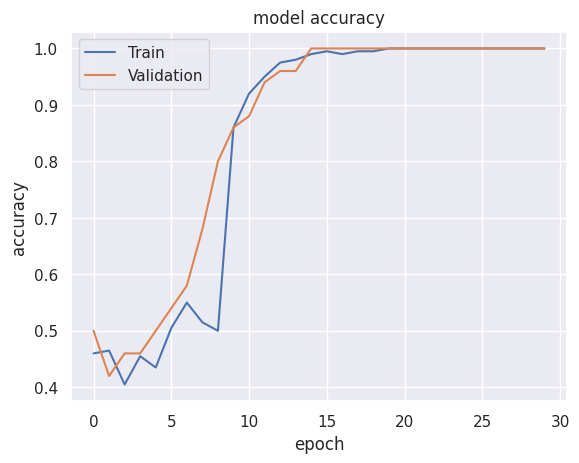

In [ ]:
# summarize history for accuracy
plt.plot(history_fit.history['accuracy'])
plt.plot(history_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
#plt.show()
plt.savefig('ResultsAccuracy_ToyExample_30epochs.pdf')

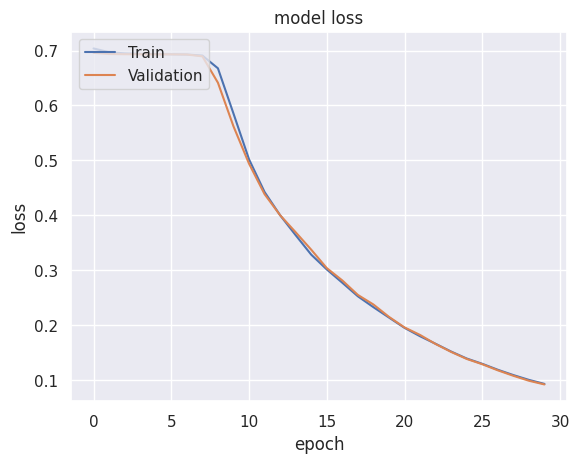

In [ ]:
# summarize history for loss
plt.plot(history_fit.history['loss'])
plt.plot(history_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
#plt.show()
plt.savefig('ResultsLoss_ToyExample_30epochs.pdf')

## **After the analysis, train the model for 5 epochs and save**

In [5]:
# Create the neural network model with two hidden layers
model = Sequential([Dense(5, input_shape=(7,),activation='relu')])
model.add(layers.Dense(3))
model.add(layers.Activation(activations.relu))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 40        
                                                                 
 dense_4 (Dense)             (None, 3)                 18        
                                                                 
 activation_1 (Activation)   (None, 3)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Rerun the construction of the model, then train

opt = keras.optimizers.Adam()
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_fit = model.fit(X, y, epochs=5, batch_size=1, verbose = 2, validation_data= (X_test_shuffled, y_test_shuffled))

Epoch 1/5
200/200 - 1s - loss: 0.4287 - accuracy: 0.6650 - val_loss: 0.3752 - val_accuracy: 0.8200 - 882ms/epoch - 4ms/step
Epoch 2/5
200/200 - 0s - loss: 0.3309 - accuracy: 0.8700 - val_loss: 0.2870 - val_accuracy: 0.9600 - 252ms/epoch - 1ms/step
Epoch 3/5
200/200 - 0s - loss: 0.2481 - accuracy: 0.9650 - val_loss: 0.1999 - val_accuracy: 1.0000 - 247ms/epoch - 1ms/step
Epoch 4/5
200/200 - 0s - loss: 0.1693 - accuracy: 0.9950 - val_loss: 0.1329 - val_accuracy: 1.0000 - 261ms/epoch - 1ms/step
Epoch 5/5
200/200 - 0s - loss: 0.1115 - accuracy: 1.0000 - val_loss: 0.0917 - val_accuracy: 1.0000 - 267ms/epoch - 1ms/step


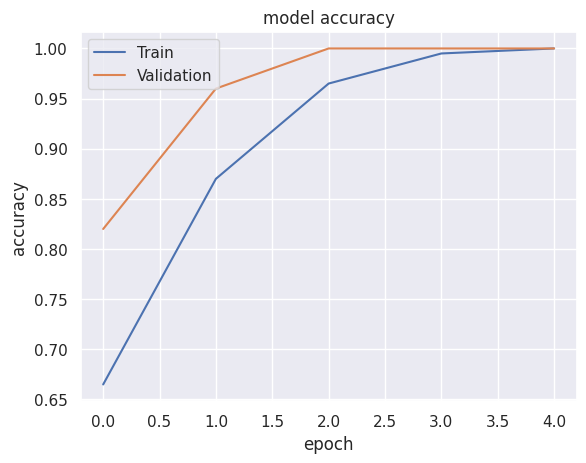

In [ ]:
# summarize history for accuracy
plt.plot(history_fit.history['accuracy'])
plt.plot(history_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
#plt.show()
plt.savefig('FinalModel_ResultsAccuracy_ToyExample_5epochs.pdf')

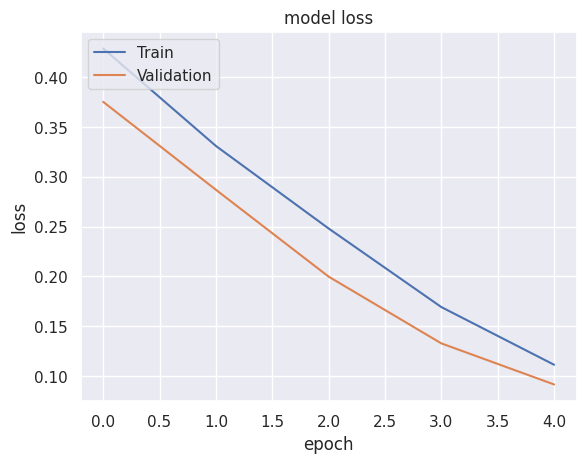

In [ ]:
# summarize history for loss
plt.plot(history_fit.history['loss'])
plt.plot(history_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
#plt.show()
plt.savefig('FinalModel_ResultsLoss_ToyExample_5epochs.pdf')

In [ ]:
# convert the history_fit.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history_fit.history) 
# save to csv: 
hist_csv_file = 'history_toyexample_5epochs.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [6]:
# Check the summary of the final model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 40        
                                                                 
 dense_4 (Dense)             (None, 3)                 18        
                                                                 
 activation_1 (Activation)   (None, 3)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Save the model
model.save('03042023_ToyExample_Model7-5-3-1_Keras.h5')

In [7]:
# Find the right layer to produce embeddings
for layer in model.layers:
    print(layer.name) # dense_4 is the embedding layer

dense_3
dense_4
activation_1
dense_5


In [ ]:
# Create a new model where the output is the embedding 
layer_embed = 'dense_4'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_embed).output)

In [ ]:
# Save the second, "truncated" model
intermediate_layer_model.save('03042023_ToyExample_EmbeddingModel7-5-3_Keras.h5')

### Phase I: Training data

In [ ]:
# Create embeddings for the training data
intermediate_output_training = intermediate_layer_model.predict(X)

7/7 [==============================] - 0s 2ms/step


In [ ]:
# Plot the training embeddings
neuron1 = intermediate_output_training[:,0]
neuron2 = intermediate_output_training[:,1]
neuron3 = intermediate_output_training[:,2]

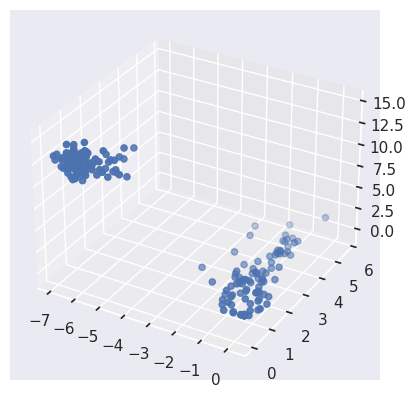

In [ ]:
# Create a 3D-plot
ax = plt.axes(projection='3d')
ax.scatter(neuron1, neuron2, neuron3)

In [ ]:
# Save predictions, i.e., the scores produced of the neural network of a sample to belong to the class 1

predictions_Xtrain = model.predict(X)

7/7 [==============================] - 0s 2ms/step


In [ ]:
# Check the predictions of the training data
predictions_Xtrain

array([[0.04290228],
       [0.99489635],
       [0.9946031 ],
       [0.10715401],
       [0.99364233],
       [0.99236673],
       [0.12446572],
       [0.9971283 ],
       [0.15201579],
       [0.9955178 ],
       [0.20651011],
       [0.99594396],
       [0.9930497 ],
       [0.9954355 ],
       [0.08485786],
       [0.14936212],
       [0.24252194],
       [0.9921354 ],
       [0.03022225],
       [0.09254034],
       [0.99253225],
       [0.99537235],
       [0.1076676 ],
       [0.9947885 ],
       [0.09215324],
       [0.99586964],
       [0.9958852 ],
       [0.9937674 ],
       [0.99529195],
       [0.0252469 ],
       [0.2733208 ],
       [0.03793409],
       [0.99578416],
       [0.9943437 ],
       [0.16806228],
       [0.99621785],
       [0.98885554],
       [0.14001857],
       [0.23501535],
       [0.9951999 ],
       [0.99646944],
       [0.16418692],
       [0.02377298],
       [0.99407536],
       [0.9966571 ],
       [0.04318316],
       [0.14280279],
       [0.337

In [ ]:
# Phase I: in-control data from training samples

f = open('ToyExample_traindata_trainingdata.txt', 'w')
np.savetxt(f, X)
f.close()

intermediate_output_training = intermediate_layer_model.predict(X)
f = open('ToyExample_traindata_embeddings3d.txt', 'w')
np.savetxt(f, intermediate_output_training)
f.close()

7/7 [==============================] - 0s 1ms/step


In [ ]:
# Save the labels of the training data
f = open('ToyExample_traindata_labels.txt', 'w')
np.savetxt(f, y)
f.close()

In [ ]:
# Save predictions, i.e., the scores produced of the neural network of a sample to belong to the class 1
predictions_Xtrain = model.predict(X)

7/7 [==============================] - 0s 2ms/step


In [ ]:
# Set binary labels
predictions_Xtrain_binary = predictions_Xtrain
predictions_Xtrain_binary[predictions_Xtrain_binary <= 0.5] = 0
predictions_Xtrain_binary[predictions_Xtrain_binary > 0.5] = 1

In [ ]:
# Create a data frame with different ways of having the output/prediction
predictions_train = pd.DataFrame(y) # add real labels
predictions_train['prediction'] = predictions_Xtrain_binary
predictions_train['score'] = model.predict(X)

In [ ]:
# Save the data frame with different ways of having the output/prediction
f = open('train_labels_scores_toyexample.txt', 'w')
np.savetxt(f, predictions_train)
f.close()

### Phase II In-Control: Test Data

In [ ]:
# Phase II In-Control: Create embeddings of the Test Data and save original input
f = open('ToyExample_testdata.txt', 'w')
np.savetxt(f, X_test_shuffled)
f.close()

intermediate_output_test = intermediate_layer_model.predict(X_test_shuffled)
f = open('ToyExample_testdata_embeddings3d.txt', 'w')
np.savetxt(f, intermediate_output_test)
f.close()

2/2 [==============================] - 0s 5ms/step


In [ ]:
# Predictions: Test Data
predictions_Xtest = model.predict(X_test_shuffled)

2/2 [==============================] - 0s 4ms/step


In [ ]:
# Set binary labels
predictions_Xtest_binary = predictions_Xtest
predictions_Xtest_binary[predictions_Xtest_binary <= 0.5] = 0
predictions_Xtest_binary[predictions_Xtest_binary > 0.5] = 1

In [ ]:
# Create a data frame with different ways of having the output/prediction
predictions_test = pd.DataFrame(y_test_shuffled) # add real labels
predictions_test['prediction'] = predictions_Xtest_binary
predictions_test['score'] = model.predict(X_test_shuffled)

2/2 [==============================] - 0s 3ms/step


In [ ]:
# Save the data frame with different ways of having the output/prediction
f = open('test_labels_scores_toyexample.txt', 'w')
np.savetxt(f, predictions_test)
f.close()

### Phase II Out-of-Control: New Data

In [ ]:
# Create new class - Phase II Out-of-control
m_new = np.full((d,), 5.0)

In [ ]:
m_new

array([5., 5., 5., 5., 5., 5., 5.])

In [ ]:
# Use the same variance-covariance matrix as for the first sample
cov_mat_new = cov_mat_1 

In [ ]:
# Generate 50 samples from a new multivariate Gaussian distribution 
n_outofcontrol = 50

X_new = np.random.multivariate_normal(mean=m_new, cov=cov_mat_new, size=n_outofcontrol)

In [ ]:
# Create embeddings from the out-of-control data
intermediate_output_outofcontrol = intermediate_layer_model.predict(X_new)

2/2 [==============================] - 0s 3ms/step


In [ ]:
# Check the embeddings of the out-of-control data
intermediate_output_outofcontrol

array([[-2.8298416 ,  0.43725425,  5.3905096 ],
       [-2.8024907 ,  0.6497834 ,  6.09308   ],
       [-2.8538165 ,  0.73465335,  6.954339  ],
       [-2.373476  ,  0.97266084,  7.097217  ],
       [-3.5812826 ,  0.3433864 ,  4.9867625 ],
       [-4.323459  ,  2.7017918 ,  7.252895  ],
       [-4.232179  ,  0.27828807,  7.72839   ],
       [-2.722996  ,  0.73378396,  5.4602547 ],
       [-2.1796722 ,  0.51042175,  4.204689  ],
       [-2.7782438 ,  0.43647105,  4.0396633 ],
       [-2.507993  ,  0.57821023,  6.1084023 ],
       [-3.3300586 ,  0.3778679 ,  5.712816  ],
       [-3.0058045 ,  0.42399925,  6.9600406 ],
       [-3.1289945 ,  0.58365965,  6.3253155 ],
       [-3.402142  ,  0.36526197,  4.9872413 ],
       [-2.6880593 ,  0.54680866,  6.5054984 ],
       [-3.0478098 ,  1.091406  ,  6.911799  ],
       [-3.0271177 ,  0.6424452 ,  7.1931915 ],
       [-3.3405757 ,  2.109066  ,  7.133655  ],
       [-2.995566  ,  0.41861874,  5.695517  ],
       [-2.949753  ,  0.41884303,  4.671

In [ ]:
# Prepare the embeddings for visualisation
neuron1_outofcontrol = intermediate_output_outofcontrol[:,0]
neuron2_outofcontrol = intermediate_output_outofcontrol[:,1]
neuron3_outofcontrol = intermediate_output_outofcontrol[:,2]

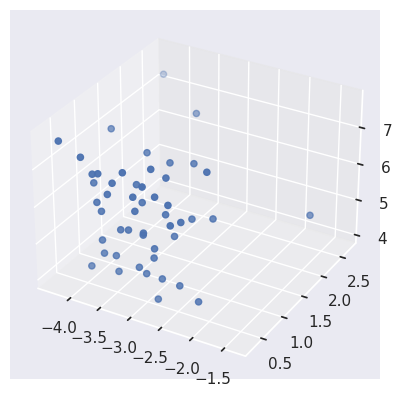

In [ ]:
# Create a 3D-plot
ax = plt.axes(projection='3d')
ax.scatter(neuron1_outofcontrol, neuron2_outofcontrol, neuron3_outofcontrol)

In [ ]:
# Save the original out-of-control samples and their embeddings 
f = open('ToyExample_outofcontroldata.txt', 'w')
np.savetxt(f, X_new)
f.close()

intermediate_output_new = intermediate_layer_model.predict(X_new)
f = open('ToyExample_outofcontroldata_embeddings3d.txt', 'w')
np.savetxt(f, intermediate_output_new)
f.close()

2/2 [==============================] - 0s 3ms/step


In [ ]:
# Predictions: New (out-of-control) Data
predictions_Xnew = model.predict(X_new)

2/2 [==============================] - 0s 4ms/step


In [ ]:
# Check predictions
predictions_Xnew

array([[0.8450697 ],
       [0.8677649 ],
       [0.9023206 ],
       [0.894074  ],
       [0.8280172 ],
       [0.7446251 ],
       [0.9468565 ],
       [0.82259685],
       [0.7504363 ],
       [0.7452204 ],
       [0.87384427],
       [0.8680956 ],
       [0.9190705 ],
       [0.8841116 ],
       [0.8259949 ],
       [0.89466745],
       [0.87755877],
       [0.9163739 ],
       [0.80283105],
       [0.8640676 ],
       [0.79844034],
       [0.84976774],
       [0.6708566 ],
       [0.8599628 ],
       [0.908693  ],
       [0.8294091 ],
       [0.86688215],
       [0.7963999 ],
       [0.8812075 ],
       [0.89919674],
       [0.9007872 ],
       [0.92435986],
       [0.8806113 ],
       [0.781276  ],
       [0.8092395 ],
       [0.8299119 ],
       [0.8167612 ],
       [0.7913971 ],
       [0.89497054],
       [0.9377288 ],
       [0.8010648 ],
       [0.92654526],
       [0.88424504],
       [0.9029716 ],
       [0.8936138 ],
       [0.9257643 ],
       [0.889429  ],
       [0.868

In [ ]:
# Set binary labels
predictions_Xnew_binary = predictions_Xnew
predictions_Xnew_binary[predictions_Xnew_binary <= 0.5] = 0
predictions_Xnew_binary[predictions_Xnew_binary > 0.5] = 1

In [ ]:
# Create a data frame with different ways of having the output/prediction
predictions_new = pd.DataFrame(np.repeat(2, n_outofcontrol)) # add new label
predictions_new['prediction'] = predictions_Xnew_binary
predictions_new['score'] = model.predict(X_new)

2/2 [==============================] - 0s 6ms/step


In [ ]:
# Save the data frame with different ways of having the output/prediction
f = open('outofcontrol_labels_scores_toyexample.txt', 'w')
np.savetxt(f, predictions_new)
f.close()